# Week4 - Homework 1

### Complete _todo_ parts in the following:

In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [297]:
def create_df():
    df = pd.DataFrame()
    n = 10000
    x = np.linspace(0, 2*np.pi, n)
    y = 2*np.cosh(x/2) + np.random.normal(0, 3, n)

    x2 = random.choices(['A', 'B'], k=n)

    df['X1'] = x
    df['X2'] = x2
    df['y'] = [ y + 5 if b == 'A' else  y for y, b in zip(y, x2)]
    return df

df = create_df()

In [298]:
df.head()

,X1,X2,y
0,0.000000,B,2.686448
1,0.000628,B,2.215807
2,0.001257,B,2.024241
3,0.001885,A,7.695514
4,0.002514,A,8.516533


<Axes: xlabel='X1', ylabel='y'>

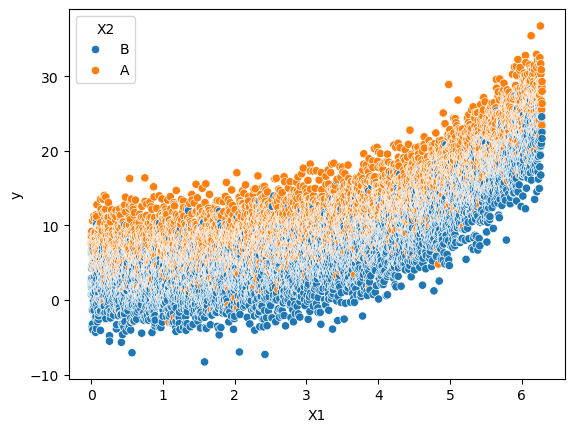

In [299]:
# Scatterplot full dataset

sns.scatterplot(data=df, x='X1', y='y', hue='X2')

<Axes: xlabel='X1', ylabel='y'>

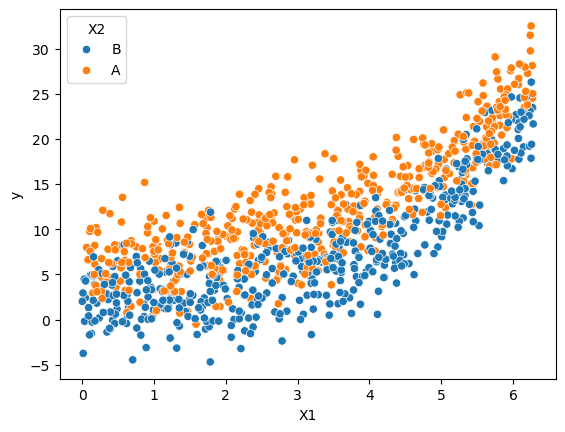

In [300]:
# Scatterplot sampled subsets

sns.scatterplot(data=df.sample(1000), x='X1', y='y', hue='X2')

#### Todo: 

As shown in the figure above, independent and independent variables may have a linear relationship between them, and categorical variables may also need to be introduced.

In [302]:
X = df[['X1', 'X2']]
y = df.y

In [303]:
X.head()

,X1,X2
0,0.000000,B
1,0.000628,B
2,0.001257,B
3,0.001885,A
4,0.002514,A


In [304]:
model = LinearRegression()
model.fit(X[['X1']], y)

model.score(X[['X1']], y) 

0.5891340374759323

In [305]:
y_pred = model.predict(X[['X1']])
r2_score( y, y_pred)

0.5891340374759323

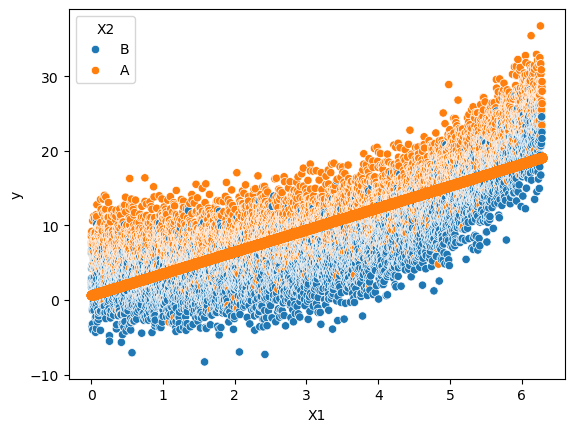

In [306]:

# Visualizing raw data and Comparing model predictions
sns.scatterplot(data=df, x='X1', y='y', hue='X2') 
plt.scatter(X.X1, y_pred)

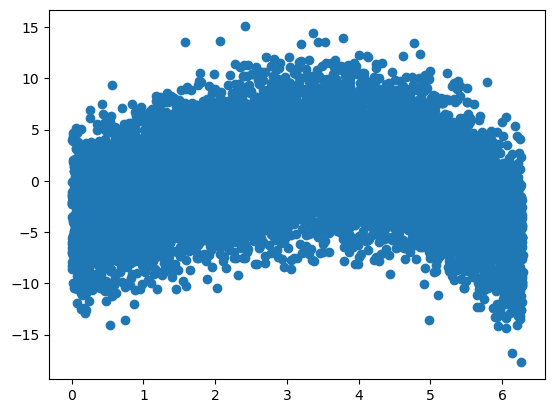

In [307]:
# residual plot distribution

plt.scatter(X.X1, y_pred-y)

<Axes: >

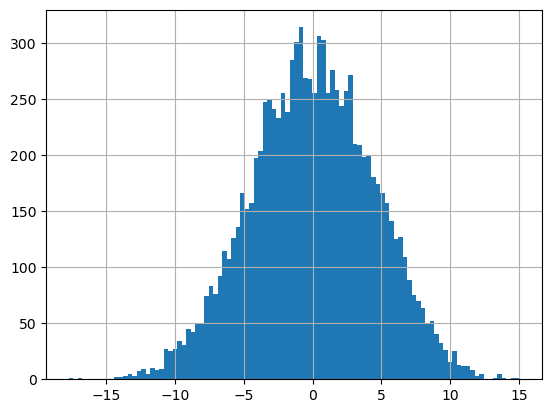

In [308]:
# residual histogram distribution

(y_pred-y).hist(bins=100)

#### Todo: 
First we built a linear relationship model, but found that the R-squared score was low and the residual distribution did not present a random distribution, so it should not be a good model. Maybe we could introduce polynomial features model.

In [310]:
# Create Polynomial Features Transformer to improve the R2 score of the model, because the linear regression model between y and X1 seems not good enough.

# Create Polynomial Features Transformer
transform = PolynomialFeatures(degree=2)
# Transform the Feature
X_data = transform.fit_transform(X[['X1']])
# Initialize Linear Regression Model and train the model
model = LinearRegression()
model.fit(X_data, y)

model.score(X_data, y) 

0.6820733226832205

In [311]:
y_pred = model.predict(X_data)
r2_score(y, y_pred)

0.6820733226832205

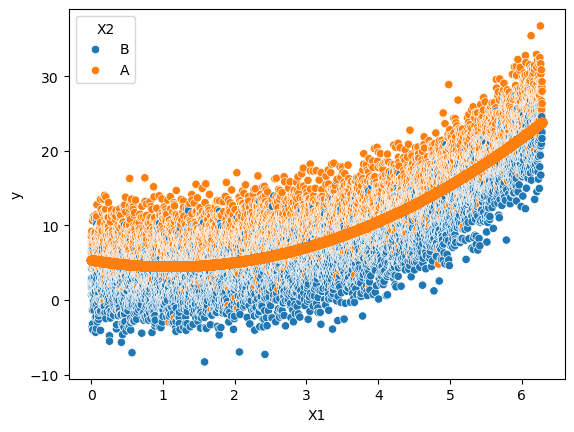

In [312]:
# Visualizing raw data and new model predictions

sns.scatterplot(data=df, x='X1', y='y', hue='X2') 
plt.scatter(X.X1, y_pred)

<Axes: >

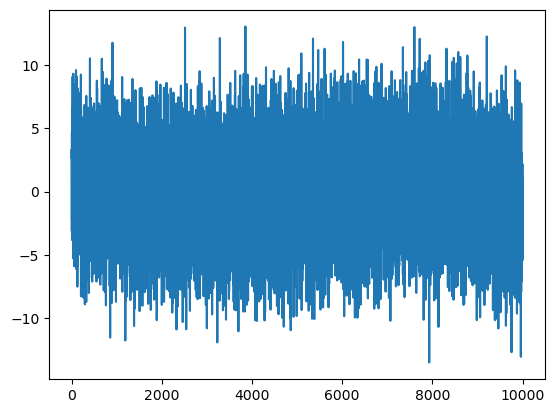

In [313]:
# residual plot distribution

(y_pred-y).plot()

<Axes: >

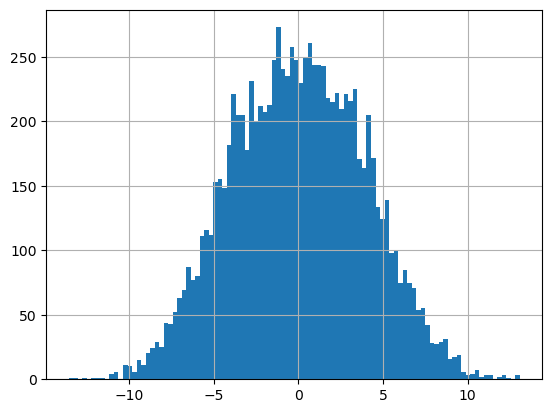

In [314]:
# residual histogram distribution

(y_pred-y).hist(bins=100)

### Todo:
Then we found that the polynomial feature model seemed to improve R-squared scores and the random distribution of and residuals, but it was not quite satisfactory, so we decided to introduce categorical variables further.

##  Finally:

In [317]:
## to see the difference (leave these blocks commented when submitting)
# encoder = OneHotEncoder()

# categorical_features = ['X2']
# encoded = encoder.fit_transform(X[categorical_features])

# pd.DataFrame(
#     data=encoded.todense(), 
#     columns=encoder.get_feature_names_out()
# ).head()

In [318]:
encoder = OneHotEncoder(drop='first')

categorical_features = ['X2']
encoded = encoder.fit_transform(X[categorical_features])

In [319]:
encoded_df = pd.DataFrame(
    data=encoded.todense(), 
    columns=encoder.get_feature_names_out()
)

In [320]:
encoded_df.head()

,X2_B
0,1.0
1,1.0
2,1.0
3,0.0
4,0.0


In [321]:
# Step 1: Define the numerical features to keep
numerical_features = ['X1']

# Step 2: Combine numerical and encoded categorical features
X_new = X[numerical_features].join(encoded_df)

# Step 3: Display the first few rows of the new dataset
X_new.head()

,X1,X2_B
0,0.000000,1.0
1,0.000628,1.0
2,0.001257,1.0
3,0.001885,0.0
4,0.002514,0.0


In [322]:
# create a Polynomial Feature Transformation model to improve model accuracy and R2 score

poly = PolynomialFeatures()
X_data = poly.fit_transform(X_new)

model = LinearRegression()
model.fit(X_data, y)

model.score(X_data, y) 

0.8106765917276135

In [323]:
y_pred = model.predict(X_data)
r2_score(y, y_pred)

0.8106765917276135

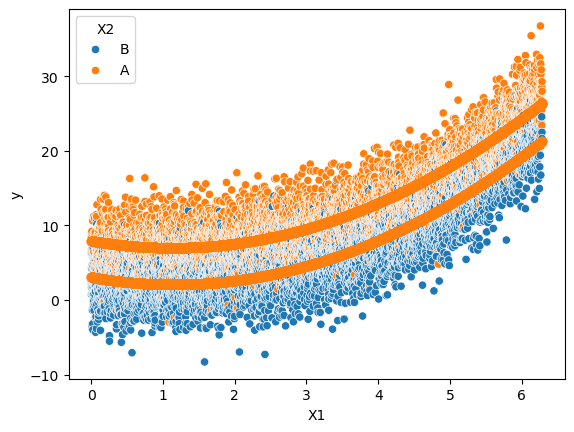

In [324]:
# if you want to see the difference between the below plot,
#  uncomment the next 2 lines & comment the other lines.
#  (leave these commented when submitting)
# plt.scatter(X_new.X1, y)
# plt.scatter(X_new.X1, y_pred)

# todo: add a proper title
# Visualizing raw data and new model predictions
sns.scatterplot(data=df, x='X1', y='y', hue='X2') 
plt.scatter(X_new.X1, y_pred)

<Axes: >

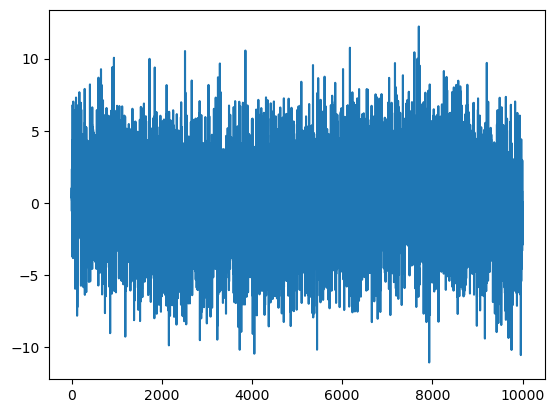

In [325]:
# residual plot distribution

(y_pred-y).plot()

<Axes: >

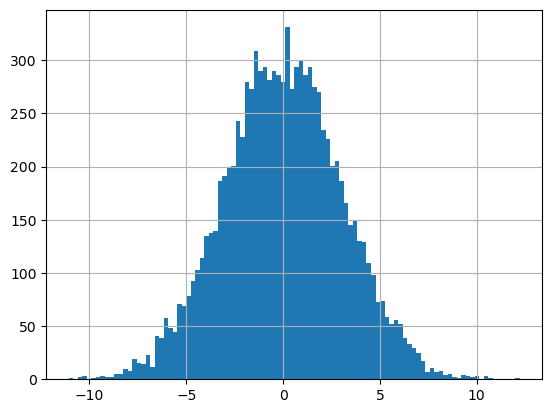

In [326]:
# residual histogram distribution

(y_pred-y).hist(bins=100)

#### Todo: 
This model with categorical variables and polynomial features seems more suitable for this dataset, as the R-squared value has reached 0.8, and the residuals show a clear improvement in random distribution.

## Create a train-test split

In [329]:
X_training, X_test, y_training, y_test = train_test_split(X, y)

print(f'Training samples: {X_training.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

Training samples: 7,500
Test samples: 2,500


 ## Train a linear regression model
  
 * Perform the model training on training set, follow the steps after `Finally` on the training set. 
 * Get the r2_score on the test set.
 
 Important note: When transforming use `fit_transform` on the training set and use `transform` on the test set.
 
 __eg:__
 
 `encoded_training = encoder.fit_transform(X_train[categorical_features])`
 
 `encoded_testing = encoder.transform(X_test[categorical_features])`
     

In [331]:
X_training.head()

,X1,X2
1157,0.727037,B
1926,1.210263,B
9394,5.903015,B
5183,3.256901,B
5042,3.168299,A


In [332]:
# code
# X_training2 = X_training.copy()

# X_training2['isB'] = [ 1 if x == 'B' else 0  for x in X_training['X2']]
# X_training2.drop('X2', axis = 1, inplace=True)
# X_training2.head()

encoder= OneHotEncoder(drop='first')
X_trainingEncoded = encoder.fit_transform(X_training[['X2']])


X_training2 = pd.DataFrame({
    'X1': X_training.X1,
    'X2': X_trainingEncoded.toarray()[:, 0]
})
X_training2.head()


,X1,X2
1157,0.727037,1.0
1926,1.210263,1.0
9394,5.903015,1.0
5183,3.256901,1.0
5042,3.168299,0.0


In [333]:
m = LinearRegression().fit(X_training2, y_training)

X_testEncoded = encoder.transform(X_test[['X2']])
X_test2 = pd.DataFrame({
    'X1': X_test.X1,
    'X2': X_testEncoded.toarray()[:, 0]
})
m.score(X_test2, y_test)

0.719195764758832

## Create a pipeline

Add comments to `todo` parts

In [335]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

cat_vars = ['X2']
num_vars = ['X1']

# todo: Create a pipeline for numerical features which applies polynomial feature transformation
num_pipeline = Pipeline([
    ('polynomial_features', PolynomialFeatures(degree=2))
])

# todo: Create a pipeline for categorical features which applies one-hot encoding
cat_pipeline = Pipeline([
    ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

# todo: Combine numerical and categorical pipelines into a single preprocessing pipeline
processing_pipeline = ColumnTransformer(transformers=[
    ('num pipeline', num_pipeline, num_vars),
    ('cat pipeline', cat_pipeline, cat_vars)
])

modeling_pipeline = Pipeline([('data_processing', processing_pipeline), 
                              ('lm', LinearRegression())
                             ])

print(modeling_pipeline)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('num pipeline',
                                                  Pipeline(steps=[('polynomial_features',
                                                                   PolynomialFeatures())]),
                                                  ['X1']),
                                                 ('cat pipeline',
                                                  Pipeline(steps=[('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['X2'])])),
                ('lm', LinearRegression())])


In [336]:
modeling_pipeline.fit(X_training, y_training)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('num pipeline',
                                                  Pipeline(steps=[('polynomial_features',
                                                                   PolynomialFeatures())]),
                                                  ['X1']),
                                                 ('cat pipeline',
                                                  Pipeline(steps=[('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['X2'])])),
                ('lm', LinearRegression())])

In [337]:
modeling_pipeline.score(X_test, y_test)

0.8136988415179882

## Evaluate/create residual plots

In [387]:
y_pred = modeling_pipeline.predict(X_test)

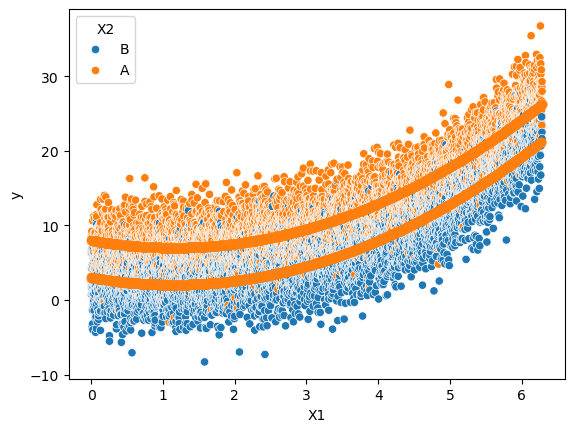

In [389]:
# code
# Visualizing raw data and new model predictions
sns.scatterplot(data=df, x='X1', y='y', hue='X2') 
plt.scatter(X_test['X1'], y_pred)


<Axes: >

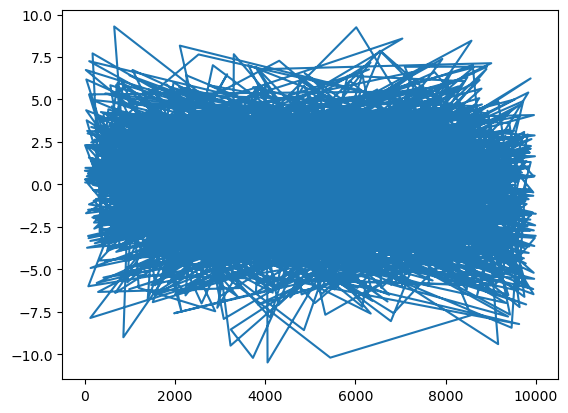

In [341]:
# residual plot distribution

(y_pred-y_test).plot()

<Axes: >

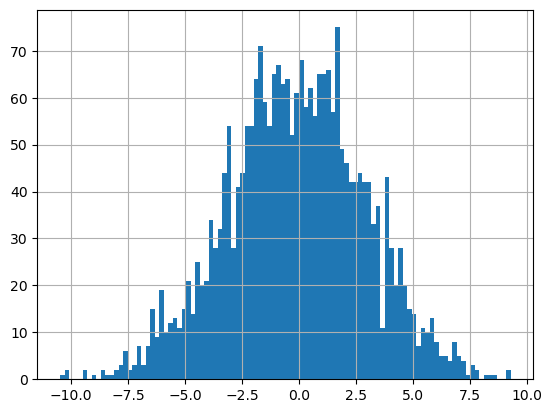

In [391]:
# residual histogram distribution

(y_pred-y_test).hist(bins=100)

## Explain findings

It seems that optimizing the model by incorporating categorical variables and polynomial features is more suitable for this dataset by comparing with the first lineal regression model, as the R-squared value reaches 0.8, and the residuals show a significant improvement in randomness. Additionally, establishing a pipeline can save a lot of time.